In [1]:
import pandas as pd
import numpy as np
from  sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import phenograph
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_dir = "/home/ucsd-train13/scratch/projects/Atlas_full/processed_files/"

In [3]:
zscore_variable_genes = pd.read_csv(data_dir+"tpm_all_vg_0.05_zscores.csv", index_col=0)
print(zscore_variable_genes.shape)
zscore_variable_genes.head()

(4067, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
4732440D04Rik,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,...,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306,-0.114306
Mcmdc2,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,...,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894,-0.027894
Cspp1,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,...,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,-0.221910,0.655883
Prdm14,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,...,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827,-0.028827
Trpa1,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,...,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380,-0.043380


In [4]:
#Initiate a PCA object to be calculated with 300 components. 
pca = PCA(n_components=300)

#Fit our data with this PCA and save the result. PCA requires the samples (cells) to be the rows of the dataframe and 
#the measurements (genes) to be the columns. So we are going to transpose our dataframe with .T
pca_result = pca.fit_transform(zscore_variable_genes.T)

In [5]:
#The explained variance ratio will tell you how much of the variation in the dataset was captured by each component. 
#Notice there are 300 values in this array, that is because we kept 200 components.
#PCs are in decreasing order

pca.explained_variance_ratio_

array([0.01806827, 0.01151089, 0.00901044, 0.00866255, 0.00566567,
       0.00440534, 0.00416421, 0.00390273, 0.00345033, 0.0033248 ,
       0.00319278, 0.00300472, 0.00279894, 0.00251489, 0.0024628 ,
       0.0023803 , 0.00234923, 0.00226868, 0.00221704, 0.00221097,
       0.00216154, 0.00207857, 0.00204516, 0.00203255, 0.00194606,
       0.00191096, 0.00184908, 0.00177077, 0.00174306, 0.00172821,
       0.00171045, 0.00169455, 0.00167727, 0.00163901, 0.00162502,
       0.00161829, 0.00159684, 0.00157518, 0.00156347, 0.00155109,
       0.0015226 , 0.00151846, 0.00151119, 0.00149706, 0.00146732,
       0.00145757, 0.00144599, 0.00143224, 0.00142803, 0.00141329,
       0.00139181, 0.00138774, 0.00137991, 0.00136581, 0.00134969,
       0.00134558, 0.00133409, 0.00132595, 0.00131854, 0.00131457,
       0.00130577, 0.00129636, 0.00129284, 0.00127883, 0.00126742,
       0.00126709, 0.00126107, 0.00125059, 0.00124088, 0.00123925,
       0.00122818, 0.0012233 , 0.00121485, 0.00120921, 0.00120

In [6]:
#look at the cumulative sum to see how many components we need to reach 100% (ish) of the variation captured

np.cumsum(pca.explained_variance_ratio_)

array([0.01806827, 0.02957916, 0.0385896 , 0.04725215, 0.05291782,
       0.05732317, 0.06148737, 0.0653901 , 0.06884043, 0.07216523,
       0.07535802, 0.07836274, 0.08116168, 0.08367656, 0.08613936,
       0.08851966, 0.09086889, 0.09313757, 0.09535461, 0.09756558,
       0.09972713, 0.1018057 , 0.10385086, 0.10588341, 0.10782947,
       0.10974043, 0.1115895 , 0.11336028, 0.11510334, 0.11683155,
       0.118542  , 0.12023655, 0.12191382, 0.12355282, 0.12517785,
       0.12679613, 0.12839298, 0.12996816, 0.13153162, 0.13308271,
       0.13460531, 0.13612378, 0.13763497, 0.13913202, 0.14059935,
       0.14205692, 0.14350292, 0.14493516, 0.14636319, 0.14777648,
       0.14916829, 0.15055603, 0.15193594, 0.15330175, 0.15465144,
       0.15599702, 0.15733111, 0.15865706, 0.15997559, 0.16129016,
       0.16259593, 0.1638923 , 0.16518513, 0.16646397, 0.16773139,
       0.16899848, 0.17025955, 0.17151014, 0.17275102, 0.17399027,
       0.17521845, 0.17644176, 0.17765661, 0.17886582, 0.18006

Text(0,0.5,'cumulative explained variance')

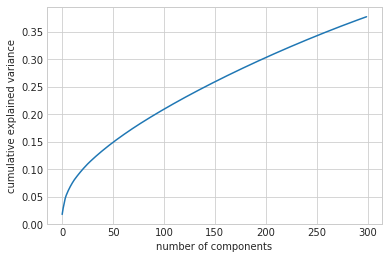

In [7]:
#make kneeplot to see where cumulative PCs form a knee 
sns.set_style("whitegrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [8]:
# select significant components: there are several methods for this. We are going with the number used in the paper
pca_df = pd.DataFrame(pca_result)
pca_df.index = zscore_variable_genes.columns
print(pca_df.shape)
pca_df.head()

(7216, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811,9.800459,-0.971940,2.114937,-3.085431,-5.103840,-0.131918,0.309993,-2.854042,...,0.368101,-0.632344,-0.837503,0.695931,0.016144,0.255659,-0.210101,-0.170854,-0.338850,0.351187
B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433,14.090662,5.553612,-1.949900,1.840460,1.624016,-0.738351,1.689827,1.917651,...,0.343640,-1.126976,2.905090,-0.328010,-0.410749,-1.066029,-0.787061,-0.089482,0.588625,-0.124756
B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729,10.087999,-0.468681,16.833816,0.854981,5.750792,-5.051358,-1.952430,1.234301,...,1.274153,-1.141836,-0.198792,-0.165094,0.249431,0.429784,0.332842,0.049305,0.235669,0.541088
B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451,11.981695,-3.907568,-2.071577,-1.617607,-0.787375,-0.930900,1.844945,-1.942317,...,-0.124806,-0.411564,-0.358928,-0.953132,-0.917896,0.097484,1.269530,0.266124,-0.327873,0.503403
B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496,15.332018,-1.848481,-1.351470,0.771526,1.546540,-2.059452,-1.252712,-0.330155,...,-0.028426,-0.022651,0.870956,-0.206928,0.160724,0.875446,-0.354747,1.119159,0.444526,0.579806


In [9]:
subset_PCA = pca_df[[0, 1]]
subset_PCA.head()

,0,1
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811
B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433
B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729
B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451
B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496


In [10]:
subset_PCA.rename(columns = {0:'x', 1:'y'}, inplace=True)

/home/ucsd-train13/anaconda2/envs/py3_cshl/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [11]:
subset_PCA.head()

,x,y
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811
B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433
B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729
B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451
B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496


In [12]:
temp = subset_PCA.reset_index()
temp.head()

,index,x,y
0,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811
1,B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433
2,B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729
3,B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451
4,B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496


In [13]:
temp ['batch'] = temp ['index'].apply(lambda x: x.split("_")[0])
temp.head()

,index,x,y,batch
0,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811,B1
1,B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433,B1
2,B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729,B1
3,B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451,B1
4,B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496,B1


In [14]:
subset_PCA = temp.set_index ('index', drop=True)
subset_PCA.head()

,x,y,batch
index,,,
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811,B1
B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433,B1
B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729,B1
B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451,B1
B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496,B1


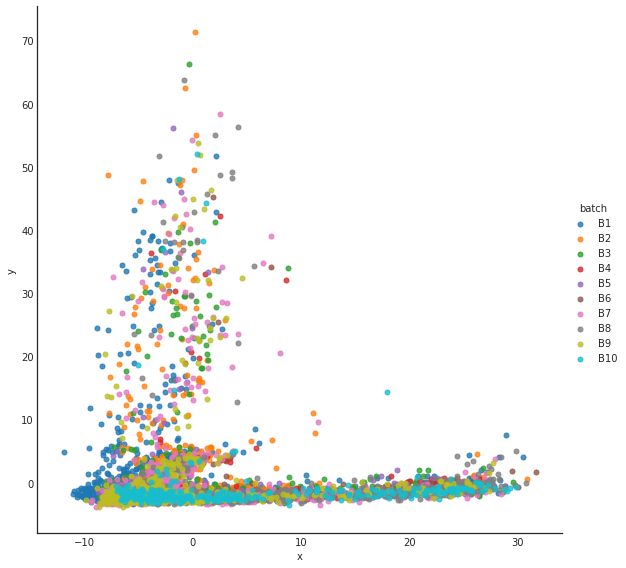

In [15]:
sns.set_style('white')

g = sns.lmplot('x', 'y', subset_PCA, hue='batch', fit_reg=False, 
              scatter_kws={"s":25}, size=8)
#we got PCAs we can use for clustering, but they are not very good for visualization

In [16]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811,9.800459,-0.971940,2.114937,-3.085431,-5.103840,-0.131918,0.309993,-2.854042,...,0.368101,-0.632344,-0.837503,0.695931,0.016144,0.255659,-0.210101,-0.170854,-0.338850,0.351187
B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433,14.090662,5.553612,-1.949900,1.840460,1.624016,-0.738351,1.689827,1.917651,...,0.343640,-1.126976,2.905090,-0.328010,-0.410749,-1.066029,-0.787061,-0.089482,0.588625,-0.124756
B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729,10.087999,-0.468681,16.833816,0.854981,5.750792,-5.051358,-1.952430,1.234301,...,1.274153,-1.141836,-0.198792,-0.165094,0.249431,0.429784,0.332842,0.049305,0.235669,0.541088
B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451,11.981695,-3.907568,-2.071577,-1.617607,-0.787375,-0.930900,1.844945,-1.942317,...,-0.124806,-0.411564,-0.358928,-0.953132,-0.917896,0.097484,1.269530,0.266124,-0.327873,0.503403
B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496,15.332018,-1.848481,-1.351470,0.771526,1.546540,-2.059452,-1.252712,-0.330155,...,-0.028426,-0.022651,0.870956,-0.206928,0.160724,0.875446,-0.354747,1.119159,0.444526,0.579806


In [17]:
pca_df[pca_df.columns[:13]].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811,9.800459,-0.971940,2.114937,-3.085431,-5.103840,-0.131918,0.309993,-2.854042,1.314442,4.096399,0.341692
B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433,14.090662,5.553612,-1.949900,1.840460,1.624016,-0.738351,1.689827,1.917651,-0.777979,-1.492962,-0.842117
B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729,10.087999,-0.468681,16.833816,0.854981,5.750792,-5.051358,-1.952430,1.234301,1.323124,-2.792991,0.238139
B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451,11.981695,-3.907568,-2.071577,-1.617607,-0.787375,-0.930900,1.844945,-1.942317,1.986499,1.162846,-1.566083
B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496,15.332018,-1.848481,-1.351470,0.771526,1.546540,-2.059452,-1.252712,-0.330155,-0.121492,1.549364,0.439837


In [18]:
num_PCA_components_to_keep = 15

cols = list(range(num_PCA_components_to_keep))
subset = pca_df[cols]
print(subset.shape)
subset.head()
#to make subsetted dataframe that only contains the first 15 columns 

(7216, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811,9.800459,-0.971940,2.114937,-3.085431,-5.103840,-0.131918,0.309993,-2.854042,1.314442,4.096399,0.341692,-0.358889,-0.295246
B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433,14.090662,5.553612,-1.949900,1.840460,1.624016,-0.738351,1.689827,1.917651,-0.777979,-1.492962,-0.842117,-0.026241,-0.856298
B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729,10.087999,-0.468681,16.833816,0.854981,5.750792,-5.051358,-1.952430,1.234301,1.323124,-2.792991,0.238139,0.415763,-0.422530
B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451,11.981695,-3.907568,-2.071577,-1.617607,-0.787375,-0.930900,1.844945,-1.942317,1.986499,1.162846,-1.566083,0.319186,-1.153159
B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496,15.332018,-1.848481,-1.351470,0.771526,1.546540,-2.059452,-1.252712,-0.330155,-0.121492,1.549364,0.439837,-0.040171,0.206138


In [19]:
communities_300, sparse_matrix300, Q300 = phenograph.cluster(subset, k=300)

Finding 300 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.6297731399536133 seconds
Jaccard graph constructed in 42.08998966217041 seconds
Wrote graph to binary file in 4.996750354766846 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.770736
After 3 runs, maximum modularity is Q = 0.772028
After 8 runs, maximum modularity is Q = 0.773496
Louvain completed 28 runs in 22.427140474319458 seconds
PhenoGraph complete in 71.81959986686707 seconds


In [20]:
communities_500, sparse_matrix500, Q500 = phenograph.cluster(subset, k=500)

Finding 500 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.844322681427002 seconds
Jaccard graph constructed in 124.88046455383301 seconds
Wrote graph to binary file in 7.785661220550537 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.739875
Louvain completed 21 runs in 24.41771125793457 seconds
PhenoGraph complete in 159.88364362716675 seconds


In [21]:
communities_100, sparse_matrix100, Q100 = phenograph.cluster(subset, k=100)

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.3440628051757812 seconds
Jaccard graph constructed in 6.938267946243286 seconds
Wrote graph to binary file in 1.4826061725616455 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.824449
After 8 runs, maximum modularity is Q = 0.82599
After 10 runs, maximum modularity is Q = 0.827467
Louvain completed 30 runs in 11.09613847732544 seconds
PhenoGraph complete in 20.97044014930725 seconds


In [22]:
# different k values reult in different modularity score. Q=1 everything is interconnected, Q=0 nothing is interconnected

In [23]:
communities_50, sparse_matrix50, Q50 = phenograph.cluster(subset, k=50)

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.0257151126861572 seconds
Jaccard graph constructed in 2.485224723815918 seconds
Wrote graph to binary file in 0.918980598449707 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.852996
After 12 runs, maximum modularity is Q = 0.854538
Louvain completed 32 runs in 8.043888092041016 seconds
PhenoGraph complete in 12.530563116073608 seconds


In [24]:
subset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,-0.132621,-1.465811,9.800459,-0.971940,2.114937,-3.085431,-5.103840,-0.131918,0.309993,-2.854042,1.314442,4.096399,0.341692,-0.358889,-0.295246
B1_AAACCGTGCCAAGT_Tuft,-7.711044,2.864433,14.090662,5.553612,-1.949900,1.840460,1.624016,-0.738351,1.689827,1.917651,-0.777979,-1.492962,-0.842117,-0.026241,-0.856298
B1_AAACGCACAGCCTA_Goblet,-5.170977,4.687729,10.087999,-0.468681,16.833816,0.854981,5.750792,-5.051358,-1.952430,1.234301,1.323124,-2.792991,0.238139,0.415763,-0.422530
B1_AAACGCACCAGATC_Endocrine,-4.732976,8.980451,11.981695,-3.907568,-2.071577,-1.617607,-0.787375,-0.930900,1.844945,-1.942317,1.986499,1.162846,-1.566083,0.319186,-1.153159
B1_AAACGCACCGCCTT_Stem,-7.555880,-1.749496,15.332018,-1.848481,-1.351470,0.771526,1.546540,-2.059452,-1.252712,-0.330155,-0.121492,1.549364,0.439837,-0.040171,0.206138


In [25]:
len(communities_50)

7216

In [26]:
Q50

0.854538

In [27]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50,
            n_iter=1000, learning_rate = 150)
tsne_pca = tsne.fit_transform(subset)
# see: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
#important parameter: learning_rate

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7216 samples in 0.015s...
[t-SNE] Computed neighbors for 7216 samples in 1.947s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7216
[t-SNE] Computed conditional probabilities for sample 2000 / 7216
[t-SNE] Computed conditional probabilities for sample 3000 / 7216
[t-SNE] Computed conditional probabilities for sample 4000 / 7216
[t-SNE] Computed conditional probabilities for sample 5000 / 7216
[t-SNE] Computed conditional probabilities for sample 6000 / 7216
[t-SNE] Computed conditional probabilities for sample 7000 / 7216
[t-SNE] Computed conditional probabilities for sample 7216 / 7216
[t-SNE] Mean sigma: 1.215653
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.876732
[t-SNE] Error after 1000 iterations: 1.058062


In [28]:
df_tsne_pca = pd.DataFrame(tsne_pca, index = subset.index)
df_tsne_pca.rename(columns = {0:'x',1:'y'}, inplace=True)
df_tsne_pca['community_500'] = communities_500
df_tsne_pca['community_300'] = communities_300
df_tsne_pca['community_100'] = communities_100
df_tsne_pca['community_50'] = communities_50

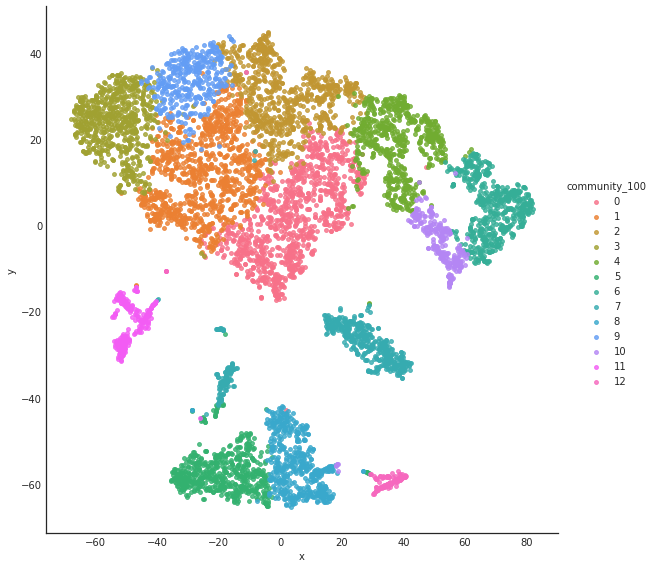

In [29]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_100', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

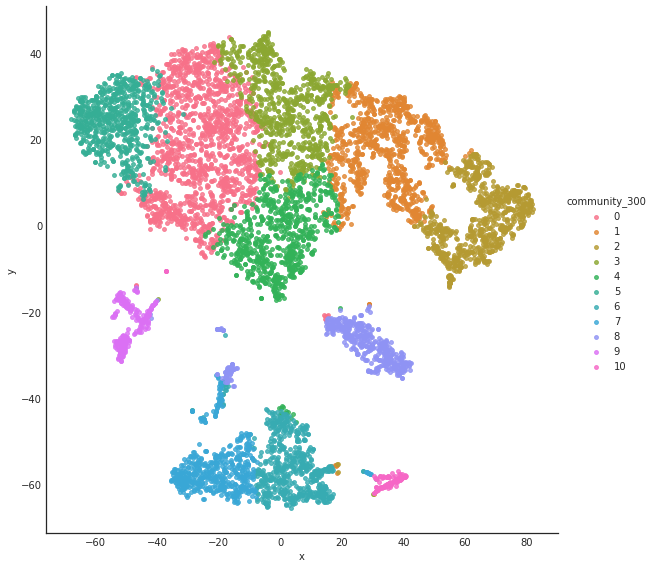

In [30]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_300', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

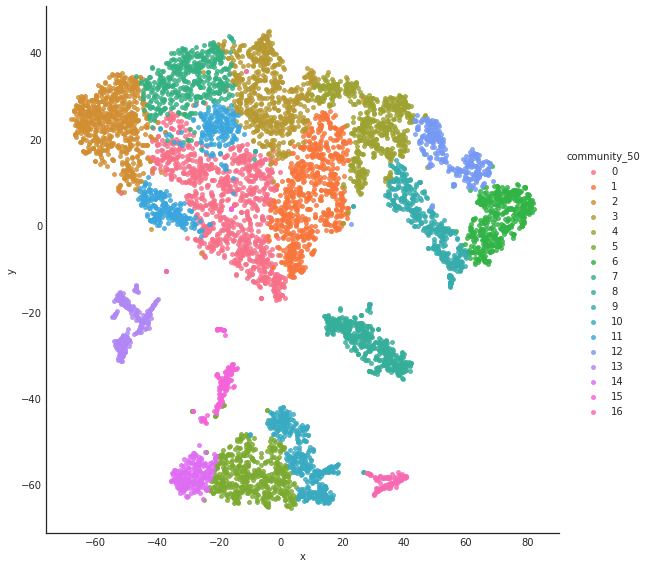

In [31]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_50', fit_reg=False, 
              scatter_kws={"s":15}, size=8)